In [6]:
pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [1]:
import tensorflow as tf

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Epoch 1/50
3/3 [==============================] - 5s 18ms/step - loss: 0.3801
Epoch 2/50
3/3 [==============================] - 0s 0s/step - loss: 0.2818
Epoch 3/50
3/3 [==============================] - 0s 3ms/step - loss: 0.2080
Epoch 4/50
3/3 [==============================] - 0s 0s/step - loss: 0.1455
Epoch 5/50
3/3 [==============================] - 0s 0s/step - loss: 0.1083
Epoch 6/50
3/3 [==============================] - 0s 8ms/step - loss: 0.0820
Epoch 7/50
3/3 [==============================] - 0s 0s/step - loss: 0.0773
Epoch 8/50
3/3 [==============================] - 0s 601us/step - loss: 0.0859
Epoch 9/50
3/3 [==============================] - 0s 8ms/step - loss: 0.0896
Epoch 10/50
3/3 [==============================] - 0s 0s/step - loss: 0.0851
Epoch 11/50
3/3 [==============================] - 0s 9ms/step - loss: 0.0803
Epoch 12/50
3/3 [==============================] - 0s 0s/step - loss: 0.0766
Epoch 13/50
3/3 [==============================] - 0s 310us/step - loss: 0.0

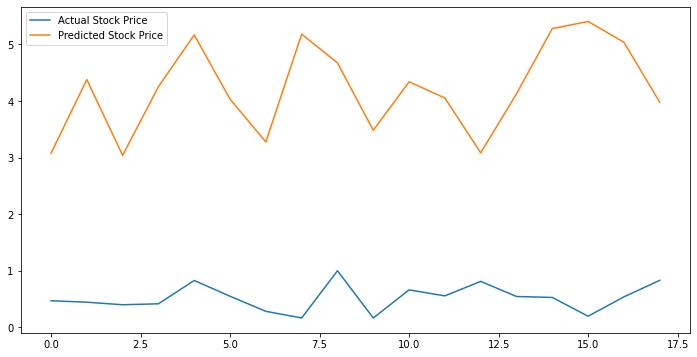

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
np.random.seed(0)
num_points = 100
data = np.random.rand(num_points) * 10 + np.sin(np.linspace(0, 10, num_points))
scaler = MinMaxScaler()
data = data.reshape(-1, 1)
data = scaler.fit_transform(data)
X, y = [], []
look_back = 10
for i in range(len(data) - look_back):
    X.append(data[i:i+look_back])
    y.append(data[i+look_back])
X, y = np.array(X), np.array(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = Sequential()
model.add(LSTM(50, input_shape=(look_back, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=50, batch_size=32)
predicted_stock_price = model.predict(X_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual Stock Price')
plt.plot(predicted_stock_price, label='Predicted Stock Price')
plt.legend()
plt.show()